## 1- Computation on NumPy Arrays: Universal Functions

Computation on NumPy arrays can be very fast, or it can be very slow. \
The key to making it fast is to use vectorized operations, generally implemented through NumPy’s universal functions (ufuncs).

### The Slowness of Loops
- Python’s default implementation (known as CPython)
    -does some operations very slowly. 
    -due to the dynamic, interpreted nature of the language
    
- Recently there have been various attempts to address this weakness: well-known examples are:

    - **PyPy project:** a just-in-time compiled implementation of Python
    - **Cython project:** converts Python code to compilable C code
    - **PyPy project:** converts snippets of Python code to fast LLVM bytecode
    
- none of the three approaches has yet surpassed the reach and popularity of the standard CPython engine.

In [1]:
import numpy as np
np.random.seed(0)

In [2]:
def compute_reciprocals(nums):
    out = np.empty(len(nums))
    for i in range(len(nums)):
        out[i] = 1.0 / nums[i]
    return out

nums = np.random.randint(1,10,5)

In [3]:
print(nums)
compute_reciprocals(nums)

[6 1 4 4 8]


array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

In [4]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)


1.91 s ± 187 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


***the slow down here*** is not by the operations themselves. \
**But** the type-checking and function dispatches that CPython must do at each cycle of the loop. \
**Each time the reciprocal is computed**
- Python first examines the object’s type
- and does a dynamic lookup of the correct function to use for that type.

### Introducing UFuncs
>NumPy provides a convenient interface into just this
kind of statically typed, compiled routine.

In [5]:
print(compute_reciprocals(nums))
print(1.0 / nums)


[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


In [6]:
%timeit (1.0 / big_array)

2.91 ms ± 364 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### operate on two arrays also

In [7]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [8]:
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

#### Array arithmetic

In [9]:
x = np.arange(4)
print("x =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2) 
print("-x = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2 = ", x % 2)

x = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]
-x =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2 =  [0 1 0 1]


In [10]:
print("x =", x)
print("x + 5 =", np.add(x,5))
print("x - 5 =", np.subtract(x,5))
print("x * 2 =", np.multiply(x,2))
print("x / 2 =", np.divide(x,2))
print("x // 2 =",np.floor_divide(x,2)) 
print("-x = ",   np.negative(x))
print("x ** 2 = ",np.power(x,2))
print("x % 2 = ", np.mod(x,2))

x = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]
-x =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2 =  [0 1 0 1]


#### Absolute value


In [11]:
x = np.arange(-2,3)
x

array([-2, -1,  0,  1,  2])

In [12]:
np.abs(x)

array([2, 1, 0, 1, 2])

In [13]:
cmplx = np.array([3 - 4j, 4 - 3j, 2 + 0j, 0 + 1j])
np.abs(cmplx)

array([5., 5., 2., 1.])

#### Trigonometric functions

In [14]:
theta = np.linspace(0, np.pi, 3)

In [15]:
print("theta = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


>The values are computed to within machine precision, which is why values that
should be zero do not always hit exactly zero.

In [16]:
## inverse trig functions ##
x = [-1, 0, 1]
print("x = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


In [17]:
print("arccos(x) in degree = ", np.degrees(np.arccos(x)))

arccos(x) in degree =  [180.  90.   0.]


#### Exponents and logarithms


In [18]:
x = [1, 2, 3]
print("x =", x)
print("e^x =", np.exp(x))
print("2^x =", np.exp2(x))
print("3^x =", np.power(3, x))

x = [1, 2, 3]
e^x = [ 2.71828183  7.3890561  20.08553692]
2^x = [2. 4. 8.]
3^x = [ 3  9 27]


>**The basic *np.log*
gives the natural logarithm**

In [19]:
x = [1, 2, 4, 10]
print("x =", x)
print("ln(x) =", np.log(x))
print("log2(x) =", np.log2(x))
print("log10(x) =", np.log10(x))


x = [1, 2, 4, 10]
ln(x) = [0.         0.69314718 1.38629436 2.30258509]
log2(x) = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


>**There are also some specialized versions that are useful for maintaining precision
with very small input**

In [20]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


### Advanced Ufunc Features

#### Specifying output
>For large calculations, it is useful to be able to specify the array where the
result of the calculation will be stored. \
Rather than creating a temporary array, you can use this to write computation results directly to the memory location where you’d

In [21]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)


array([ 0., 10., 20., 30., 40.])

In [22]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


In [23]:
y = np.zeros(10)
y[::2] = 2 ** x
y

array([ 1.,  0.,  2.,  0.,  4.,  0.,  8.,  0., 16.,  0.])

- this will first create temporary array to store this data
- then copy this values into the y array
- This doesn’t make much of a difference for such a small computation
- but for very large arrays the memory savings from careful use of the out argument can be significant

#### Aggregates

In [24]:
x = np.arange(1, 6)
x

array([1, 2, 3, 4, 5])

In [25]:
np.add.reduce(x)

15

In [26]:
np.multiply.reduce(x)

120

In [27]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [28]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

#### Outer products
> the output of all pairs of two different inputs using
the outer method.

In [29]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

In [30]:
x = np.array([1,2,3])
y = np.array([2,4,3,5,6])
np.multiply.outer(x,y)

array([[ 2,  4,  3,  5,  6],
       [ 4,  8,  6, 10, 12],
       [ 6, 12,  9, 15, 18]])

## Aggregations: Min, Max, and Everything in Between
>Often when you are faced with a large amount of data, a first step is to compute summary statistics for the data in question. Perhaps the most common summary statistics
are the mean and standard deviation, which allow you to summarize the “typical” values in a dataset, but other aggregates are useful as well (the sum, product, median,
minimum and maximum, quantiles, etc.).



### Summing the Values in an Array

In [31]:
x = np.random.random(100)

In [32]:
print(np.sum(x))
print(sum(x))

50.46175845319564
50.461758453195614


In [33]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

65.1 ms ± 5.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
891 µs ± 111 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Minimum and Maximum

In [34]:
min(big_array), max(big_array)

(7.071203171893359e-07, 0.9999997207656334)

In [35]:
np.min(big_array), np.max(big_array)

(7.071203171893359e-07, 0.9999997207656334)

In [36]:
%timeit min(big_array)
%timeit np.min(big_array)

42.2 ms ± 3.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
563 µs ± 58.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [37]:
big_array.min(), big_array.max(), big_array.sum()

(7.071203171893359e-07, 0.9999997207656334, 500216.8034810001)

### Multidimensional aggregates

In [38]:
x = np.arange(1,17).reshape(4,4)
x

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [39]:
x.min()

1

In [40]:
x.min(axis = 0)

array([1, 2, 3, 4])

In [41]:
x.min(axis = 1)

array([ 1,  5,  9, 13])

> **The axis keyword specifies the dimension of the array that will be collapsed**
![title](imgs/numpyAggregationFunc.png)

### Exercise

In [42]:
import pandas as pd
data = pd.read_csv("../datasets/ds_salaries.csv")
salaries = np.array(data['salary_in_usd'])
print(salaries[:50])
print(salaries.size)

[ 79833 260000 109024  20000 150000  72000 190000  35735 135000 125000
  51321  40481  39916  87000  85000   8000  41689 114047   5707  56000
  43331   6072  47899  98000 115000 325000  42000  33511 100000 117104
  59303  70000  68428 450000  46759  74130 103000 250000  10000 138000
  45760  79833  50180 106000 112872  15966  76958 188000 105000  70139]
607


In [43]:
print("Mean Salary: ", salaries.mean())
print("Standard deviation:", salaries.std())
print("Minimum Salary: ", salaries.min())
print("Maximum Salary: ", salaries.max())


Mean Salary:  112297.86985172982
Standard deviation: 70898.78617574446
Minimum Salary:  2859
Maximum Salary:  600000


In [44]:
print("25th percentile: ", np.percentile(salaries, 25))
print("Median: ", np.median(salaries))
print("75th percentile: ", np.percentile(salaries, 75))

25th percentile:  62726.0
Median:  101570.0
75th percentile:  150000.0


In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

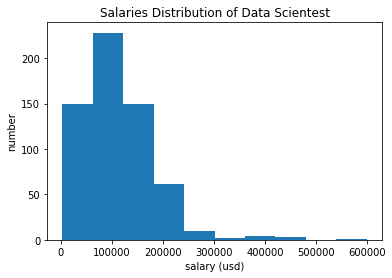

In [46]:
plt.hist(salaries)
plt.title('Salaries Distribution of Data Scientest')
plt.xlabel('salary (usd)')
plt.ylabel('number');


## Computation on Arrays: Broadcasting

>Broadcasting is simply a set of rules for applying binary ufuncs (addition, subtraction, multiplication, etc.) on
arrays of different sizes.


In [47]:
a = np.array([0,1,2])
b = np.full((1,3), 5)

In [48]:
a+b

array([[5, 6, 7]])

In [49]:
a + 5

array([5, 6, 7])

In [50]:
M = np.ones((3,3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [51]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

***what about more complex Broadcasting?***

In [52]:
a = np.arange(3)
b = a[:, np.newaxis]
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [53]:
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

![title](imgs/numpyBroadcasting.png)

### Rules of Broadcasting:
Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:
- **Rule 1:** If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
- **Rule 2:** If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- **Rule 3:** If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

#### Examples

In [54]:
M = np.ones((2, 3))
a = np.arange(3)

**Original Shape** 

    M shape-> (2,3) 
    a shape-> (3,)
    
**by rule number 1** 

    M shape-> (2,3) 
    a shape-> (1,3) 
    
**by rule number 2** 

    M shape-> (2,3) 
    a shape-> (2,3) 

In [55]:
M+a

array([[1., 2., 3.],
       [1., 2., 3.]])

In [56]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

**Original Shape** 

    a shape-> (3,1) 
    b shape-> (3,)
    
**by rule number 1** 

    a shape-> (3,1) 
    b shape-> (1,3) 
    
**by rule number 2** 

    a shape-> (3,3) 
    b shape-> (3,3) 

In [57]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [58]:
M = np.ones((3, 2))
a = np.arange(3)

**Original Shape** 

    M shape-> (3,2) 
    a shape-> (3,)
    
**by rule number 1** 

    M shape-> (3,2) 
    a shape-> (1,3) 
    
**by rule number 2** 

    M shape-> (3,2) 
    a shape-> (3,3) 

In [59]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

***we can solve by right padding but as it doesn't exisist  we can use reshaping***

In [60]:
a[:, np.newaxis]

array([[0],
       [1],
       [2]])

In [61]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

### Broadcasting in Practice
##### 1-Centering an array

In [62]:
x = np.random.random((10,3))
x

array([[0.79832448, 0.44923861, 0.95274259],
       [0.03193135, 0.18441813, 0.71417358],
       [0.76371195, 0.11957117, 0.37578601],
       [0.11936151, 0.37497044, 0.22944653],
       [0.07452786, 0.41843762, 0.99939192],
       [0.66974416, 0.54717434, 0.82711104],
       [0.23097044, 0.16283152, 0.27950484],
       [0.58540569, 0.90657413, 0.18671025],
       [0.07262851, 0.0068539 , 0.07533272],
       [0.77114754, 0.94502816, 0.79396332]])

In [63]:
Xmean = x.mean(0)
Xmean

array([0.41177535, 0.4115098 , 0.54341628])

In [64]:
Xcentered = x - Xmean
Xcentered.mean(0)

array([ 4.44089210e-17,  6.66133815e-17, -3.33066907e-17])

##### Plotting a two-dimensional function

$z = sin(x)^{10} + cos(10+yx)*cos(x)$ \
$ 0 ≤ x ≤ 5$ \
$ 0 ≤ y ≤ 5$

In [65]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

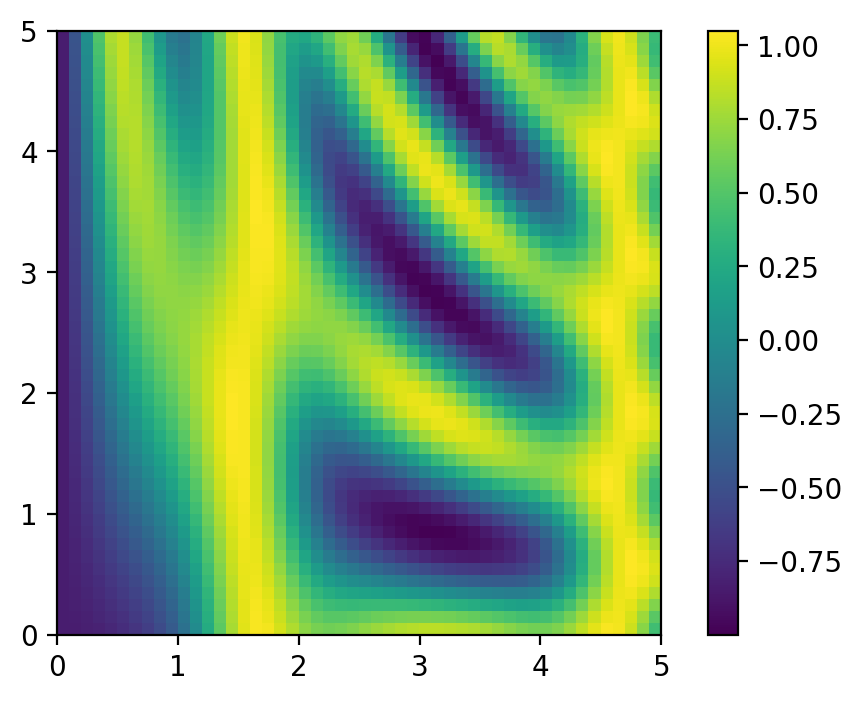

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200 ## for quality
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar();

## Comparisons, Masks, and Boolean Logic
> Masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion for example
>- count all values greater than a certain value
>- remove all outliers that are above some threshold

### Comparison Operators as ufuncs

In [67]:
x = np.arange(1, 6)
x

array([1, 2, 3, 4, 5])

In [68]:
x > 3

array([False, False, False,  True,  True])

In [69]:
x < 3

array([ True,  True, False, False, False])

In [70]:
x != 3

array([ True,  True, False,  True,  True])

In [71]:
x == 3

array([False, False,  True, False, False])

In [72]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

In [73]:
print("(x == 3) =", np.equal(x, 3))
print("(x != 3) =", np.not_equal(x, 3))
print("(x < 3) =", np.less(x, 3))
print("(x <= 3) =", np.less_equal(x, 3))
print("(x > 3) =", np.greater(x, 3))
print("(x >= 3) =", np.greater_equal(x, 3))

(x == 3) = [False False  True False False]
(x != 3) = [ True  True False  True  True]
(x < 3) = [ True  True False False False]
(x <= 3) = [ True  True  True False False]
(x > 3) = [False False False  True  True]
(x >= 3) = [False False  True  True  True]


### Working with Boolean Arrays

#### counting

In [96]:
x = np.arange(16).reshape(4,4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [97]:
x > 6

array([[False, False, False, False],
       [False, False, False,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [98]:
np.count_nonzero(x > 6)

9

In [99]:
np.sum(x > 6)

9

***The benefit of sum()***

In [100]:
np.sum(x > 6, axis=0)

array([2, 2, 2, 3])

In [101]:
np.sum(x > 6, axis=1)

array([0, 1, 4, 4])

In [102]:
np.any(x > 8)

True

In [103]:
np.all(x > 8)

False

In [104]:
np.all(x < 50)

True

In [105]:
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [106]:
np.all(x < 12, axis=1)

array([ True,  True,  True, False])

In [107]:
(x > 2) & (x < 15)

array([[False, False, False,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True, False]])

In [108]:
(x < 2) | (x > 15)

array([[ True,  True, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

In [109]:
~((x < 2) | (x > 15))

array([[False, False,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [110]:
((x > 2) ^ (x < 15))

array([[ True,  True,  True, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False,  True]])

### Exercise

In [125]:
rainfall = pd.read_csv('../datasets/Seattle2014.csv')['PRCP'].values
rainfall.shape

(365,)

In [128]:
print("Number days without rain: ", np.sum(rainfall == 0))
print("Number days with rain: ", np.sum(rainfall != 0))
print("Days with more than 100 mm:", np.sum(rainfall > 100))
print("Rainy days with < 100 mm :", np.sum((rainfall > 0) & (rainfall < 100)))

Number days without rain:  215
Number days with rain:  150
Days with more than 100 mm: 47
Rainy days with < 100 mm : 103


### Boolean Arrays as Masks

In [146]:
x = np.random.randint(0, 10, (4,4))

In [147]:
x

array([[4, 3, 7, 3],
       [2, 9, 9, 7],
       [5, 2, 7, 7],
       [3, 7, 7, 2]])

In [149]:
x > 5

array([[False, False,  True, False],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False,  True,  True, False]])

In [150]:
x[x > 5]

array([7, 9, 9, 7, 7, 7, 7, 7])

In [151]:
x[x!=7]

array([4, 3, 3, 2, 9, 9, 5, 2, 3, 2])

### Exercise

In [153]:
rainy = rainfall > 0

In [158]:
# construct a mask of all summer days (June 21st is the 172nd day)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)

In [156]:
print("Median precip on rainy days in (mm): ",np.median(rainfall[rainy]))
print("Median precip on summer days in  (mm): ",np.median(rainfall[summer]))
print("Maximum precip on summer days in  (mm): ",np.max(rainfall[summer]))
print("Median precip on non-summer rainy days (mm):",np.median(rainfall[rainy & ~summer]))

Median precip on rainy days in (mm):  49.5
Median precip on summer days in  (mm):  0.0
Maximum precip on summer days in  (mm):  216
Median precip on non-summer rainy days (mm): 51.0


## Fancy Indexing

access and modify portions of arrays till now using
- simple indices arr[0]
- slice arr[:5]
- boolean masks arr[arr>5]

fancy indexing will access array by array of incides

### Intro to fancy indexing

In [167]:
x = np.random.randint(0,100, 10)
x

array([49, 26, 92, 31,  8, 70, 97, 75,  4, 96])

In [168]:
[x[0], x[6], x[-1]]

[49, 97, 96]

In [171]:
ind = [0, 6,-1]
x[ind]

array([49, 97, 96])

In [172]:
ind = np.array([[0,6]
               ,[-1,-2]])

x[ind]

array([[49, 97],
       [96,  4]])

In [175]:
x = np.arange(12).reshape((3, 4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [179]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
x[row, col]

array([ 2,  5, 11])

In [177]:
x[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [180]:
row = np.array([[1],[2]])

In [181]:
x[row,col]

array([[ 6,  5,  7],
       [10,  9, 11]])

### Combined Indexing

In [182]:
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [184]:
#combine with simple indices
x[2, [2, 0, 1]]

array([10,  8,  9])

In [185]:
#combine with sliceing
x[1:, [2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [217]:
#combine with mask
mask = np.array([1,0,1,0], dtype=bool)
row = np.array([0,2])
print(x[row[:,np.newaxis], mask])

[[ 0  2]
 [ 8 10]]


### Modifying Values with Fancy Indexing

In [218]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [219]:
x[i] -= 10

In [220]:
x

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

In [223]:
i = np.array([0,0])
x[i] = [4,6]

**x[0] = 4 then x[0] = 6**

In [224]:
x

array([ 6, 89, 89,  3, 89,  5,  6,  7, 89,  9])

In [225]:
x[i] += 1

In [226]:
x

array([ 7, 89, 89,  3, 89,  5,  6,  7, 89,  9])

**x[i] = x[i] + 1**

In [227]:
np.add.at(x,i, 1)

In [228]:
x

array([ 9, 89, 89,  3, 89,  5,  6,  7, 89,  9])

**because** at() modify in place

## Sorting

In [233]:
def selection_sort(x):
    for i in range(len(x)):
        min_index = i
        for j in range(i+1, len(x)):
            if x[j] < x[min_index]:
                min_index = j
        (x[i], x[min_index]) = (x[min_index], x[i])
    return x

In [238]:
x = np.array([5,60,9,-1,5,66])
selction_sort(x)

array([-1,  5,  5,  9, 60, 66])

In [239]:
def selection_sort(x):
    for i in range(len(x)):
        min_index = i + np.argmin(x[i:])
        (x[i], x[min_index]) = (x[min_index], x[i])
    return x

In [242]:
x = np.array([5,60,9,-1,5,66])
selection_sort(x)

array([-1,  5,  5,  9, 60, 66])

### Fast Sorting in NumPy: np.sort and np.argsort

In [243]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

**If you prefer to sort the array in-place, you can instead use the sort method of arrays:**

In [244]:
x.sort()
print(x)

[1 2 3 4 5]


**argsort():** return incides of sorted element

In [245]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [246]:
x[i]

array([1, 2, 3, 4, 5])

**Sorting along rows or columns**

In [253]:
np.random.seed(42)
X = np.random.randint(0,10, (4,6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [254]:
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [255]:
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [272]:
X[np.argsort(X[:,0]), :]

array([[2, 6, 7, 4, 3, 7],
       [5, 1, 4, 0, 9, 5],
       [6, 3, 7, 4, 6, 9],
       [7, 2, 5, 4, 1, 7]])

### Partial Sorts: Partitioning

In [251]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [256]:
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [261]:
np.partition(X, 1, axis = 0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [7, 6, 7, 4, 6, 7],
       [6, 3, 7, 4, 9, 9]])

In [262]:
np.partition(X, 1, axis = 1)

array([[3, 4, 7, 6, 6, 9],
       [2, 3, 7, 4, 6, 7],
       [1, 2, 5, 4, 7, 7],
       [0, 1, 4, 5, 9, 5]])

### Example: k-Nearest Neighbors

In [316]:
X

array([[0.00706631, 0.02306243],
       [0.52477466, 0.39986097],
       [0.04666566, 0.97375552],
       [0.23277134, 0.09060643],
       [0.61838601, 0.38246199],
       [0.98323089, 0.46676289],
       [0.85994041, 0.68030754],
       [0.45049925, 0.01326496],
       [0.94220176, 0.56328822],
       [0.3854165 , 0.01596625]])

In [317]:
X = np.random.rand(10,2)

In [318]:
X

array([[0.23089383, 0.24102547],
       [0.68326352, 0.60999666],
       [0.83319491, 0.17336465],
       [0.39106061, 0.18223609],
       [0.75536141, 0.42515587],
       [0.20794166, 0.56770033],
       [0.03131329, 0.84228477],
       [0.44975413, 0.39515024],
       [0.92665887, 0.727272  ],
       [0.32654077, 0.57044397]])

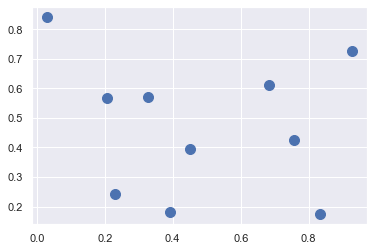

In [329]:
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

In [330]:
X.shape, X[:, np.newaxis, :].shape, X[np.newaxis, :, :].shape

((10, 2), (10, 1, 2), (1, 10, 2))

In [331]:
a = np.ones((10,10,2))
#X[:, np.newaxis, :]*a
#X[np.newaxis, :, :]*a

In [332]:
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]

In [333]:
sq_differences = differences ** 2

In [334]:
dist_sq = sq_differences.sum(2)

In [335]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)

In [336]:
nearest = np.argsort(dist_sq, axis=1)

**as all we need kth nearest neighbors we done much work**

In [337]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

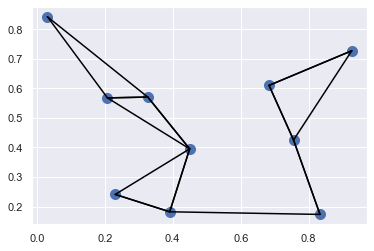

In [338]:
plt.scatter(X[:, 0], X[:, 1], s=100)
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

## Structured Data: NumPy’s Structured Arrays
>While often our data can be well represented by a homogeneous array of values,
sometimes this is not the case. This section demonstrates the use of NumPy’s structured arrays and record arrays, which provide efficient storage for compound, heterogeneous data. While the patterns shown here are useful for simple operations,
scenarios like this often lend themselves to the use of Pandas DataFrames